# Linear regression

## Short EDA on ads data

In [18]:
import pandas as pd

df = pd.read_csv("Advertising.csv", index_col=0)

In [ ]:
df.sample(5)
df.info()
df.head()
df.shape # 200 rows, 4 columns: 3 feature and 1 label

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


(200, 4)

- features/independent variable: TV, radio, newspaper

- label/target/dependent variable: sales

<Axes: xlabel='TV', ylabel='sales'>

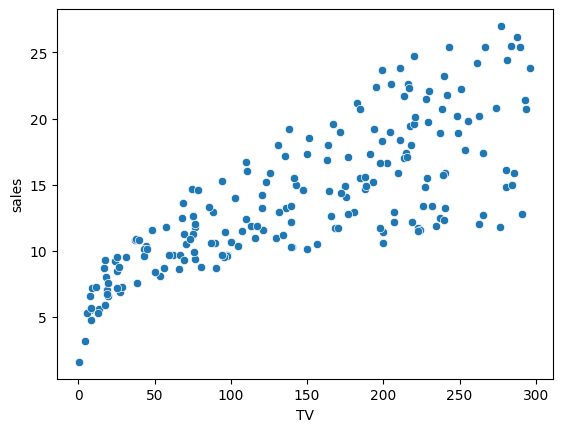

In [22]:
import seaborn as sns

sns.scatterplot(data = df, x="TV", y="sales")

[Text(0.5, 1.0, 'Newspaper spending vs sales')]

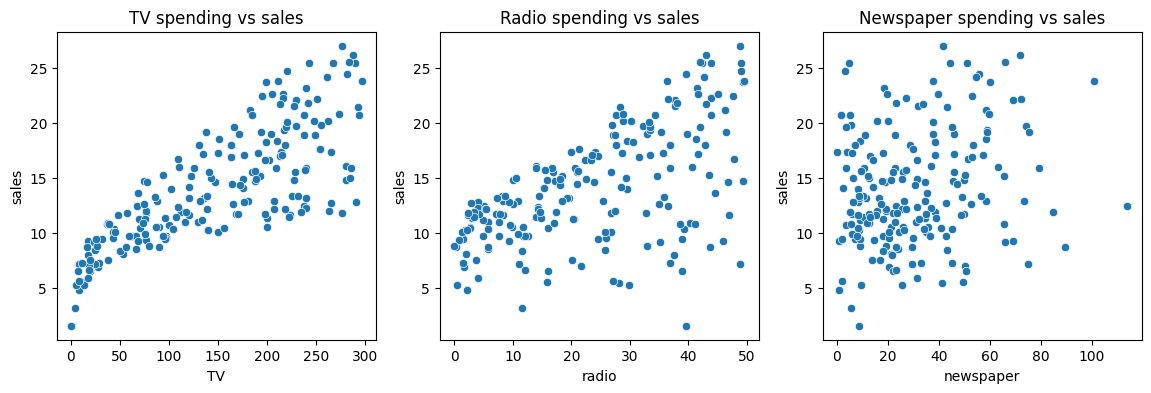

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(14,4))
sns.scatterplot(data = df, x = "TV", y="sales", ax = axes[0])
sns.scatterplot(data = df, x = "radio", y="sales", ax = axes[1])
sns.scatterplot(data = df, x = "newspaper", y="sales", ax = axes[2])

axes[0].set(title = "TV spending vs sales")
axes[1].set(title = "Radio spending vs sales")
axes[2].set(title = "Newspaper spending vs sales")

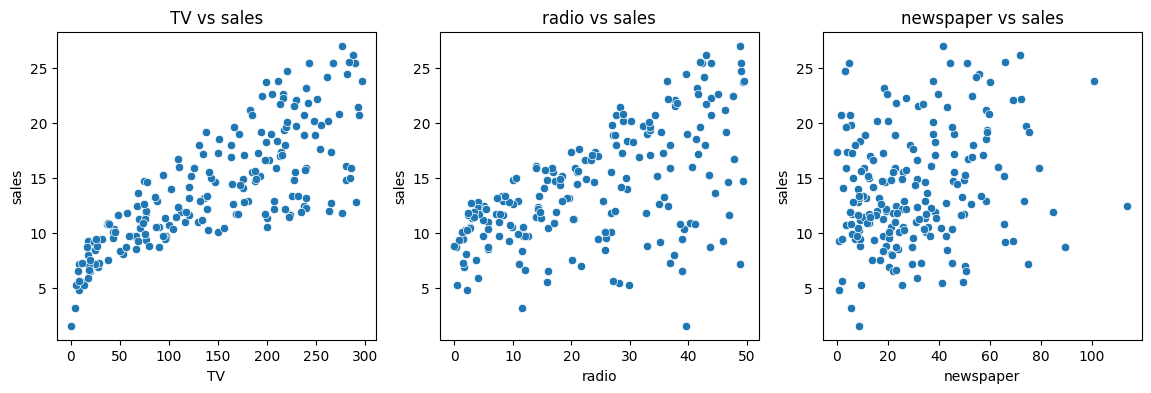

In [37]:
fig, axes = plt.subplots(1,3, figsize=(14,4))

features = ("TV", "radio", "newspaper")
for feature, ax in zip(features, axes.flatten()):
    sns.scatterplot(data = df, x = feature, y="sales", ax = ax)
    ax.set(title=f"{feature} vs sales")

## Scikit-learn steps

See this as a recipe to follow, works for most classic machine learning algorthms with some modifications

steps:

0. divide into feature X and label y
1. train|test split
2. scale dataset (some algorithms don't need scaling)
3. fit algorithm with training data
4. transform training data and test data 
5. evaluation on test data

### 0. divide into features X and label y

In [40]:
y = df["sales"]
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [44]:
# df[["TV", "newspaper", "radio"]]
X = df.drop("sales", axis=1)
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


common way that I will do the above with tuple unpacking

In [47]:
X, y = df.drop("sales", axis=1), df["sales"]

X.head(3)

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3


In [48]:
y.head(3)

1    22.1
2    10.4
3     9.3
Name: sales, dtype: float64